# Q1

参考数据中给出了全国区划.gpkg（包含“市”图层）和zhejiang_pop.csv两个文件,

请根据这两个文件，输出一个描述浙江省各市人口数据的geojson矢量文件。

> _HINT_ :  GeoPandas继承了Pandas的Contact, Join, Merge等方法

In [57]:
import geopandas as gpd 
import pandas as pd

In [58]:
# 读取全国区划，获取浙江部分
data_convince = gpd.read_file('data/全国区划.gpkg', layer='市', encoding="utf-8")
data_zhejiang = data_convince.loc[(data_convince['省'] == '浙江省')]

# 读取人口，并合并
data_population = gpd.read_file('data/zhejiang_pop.csv', encoding="gb2312")
data_zhejiang_population = pd.merge(data_zhejiang, data_population, left_on='市', right_on='地级市')
data_zhejiang_population.rename(columns={"geometry_x": "geometry"}, inplace=True)
zhejiand_pop = data_zhejiang_population.loc[:, [True, True, True, True, True, True, False, True, False]]

In [59]:
# 处理结果
zhejiand_pop

,省代码,省,市代码,市,类型,geometry,人口数
0,330000,浙江省,330100,杭州市,副省级市,"MULTIPOLYGON (((119.71982 30.56118, 119.71656 ...",11936010
1,330000,浙江省,330200,宁波市,副省级市,"MULTIPOLYGON (((122.23634 28.85761, 122.23443 ...",9404283
2,330000,浙江省,330300,温州市,地级市,"MULTIPOLYGON (((120.47933 27.15321, 120.48163 ...",9572903
3,330000,浙江省,330400,嘉兴市,地级市,"MULTIPOLYGON (((120.95956 31.01851, 120.96330 ...",5400868
4,330000,浙江省,330500,湖州市,地级市,"MULTIPOLYGON (((119.76232 31.18140, 119.76567 ...",3367579
5,330000,浙江省,330600,绍兴市,地级市,"MULTIPOLYGON (((120.79016 30.26609, 120.81356 ...",5270977
6,330000,浙江省,330700,金华市,地级市,"MULTIPOLYGON (((119.96399 29.67325, 119.96527 ...",7050683
7,330000,浙江省,330800,衢州市,地级市,"MULTIPOLYGON (((118.31081 29.49786, 118.31238 ...",2276184
8,330000,浙江省,330900,舟山市,地级市,"MULTIPOLYGON (((122.15126 29.61097, 122.14481 ...",1157817
9,330000,浙江省,331000,台州市,地级市,"MULTIPOLYGON (((121.16151 28.02435, 121.15920 ...",6622888


In [60]:
zhejiand_pop.to_file('data/zhejiang_pop.geojson', driver='GeoJSON', encoding='utf-8')

D:\miniconda3\envs\devgis\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# Q2

基于Q1的结果，选择合适的投影坐标系，制作“浙江省各市人口密度图”，要求包含一定的制图要素

In [61]:
import pyproj
import matplotlib.pyplot as plt

In [86]:
zhejiand_pop.to_crs(pyproj.CRS.from_user_input('EPSG:4236'))
zhejiand_pop['人口数'] = zhejiand_pop['人口数'].map(lambda x: int(x))
zhejiand_pop['area'] = zhejiand_pop.to_crs(epsg=4326).area * 10000
zhejiand_pop['人口密度'] = zhejiand_pop['人口数'] / zhejiand_pop['area']

C:\Users\OrkWard\AppData\Local\Temp\ipykernel_8796\600937455.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zhejiand_pop['area'] = zhejiand_pop.to_crs(epsg=4326).area * 10000
C:\Users\OrkWard\AppData\Local\Temp\ipykernel_8796\600937455.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zhejiand_pop['centroid'] = zhejiand_pop.centroid


0      Annotation(119.47, 29.9003, '杭州市')
1     Annotation(121.461, 29.7424, '宁波市')
2      Annotation(120.44, 27.9037, '温州市')
3     Annotation(120.803, 30.6165, '嘉兴市')
4     Annotation(119.869, 30.7444, '湖州市')
5     Annotation(120.636, 29.7352, '绍兴市')
6     Annotation(119.952, 29.1183, '金华市')
7     Annotation(118.675, 28.9345, '衢州市')
8     Annotation(122.186, 30.0948, '舟山市')
9     Annotation(121.111, 28.7727, '台州市')
10    Annotation(119.512, 28.1993, '丽水市')
dtype: object

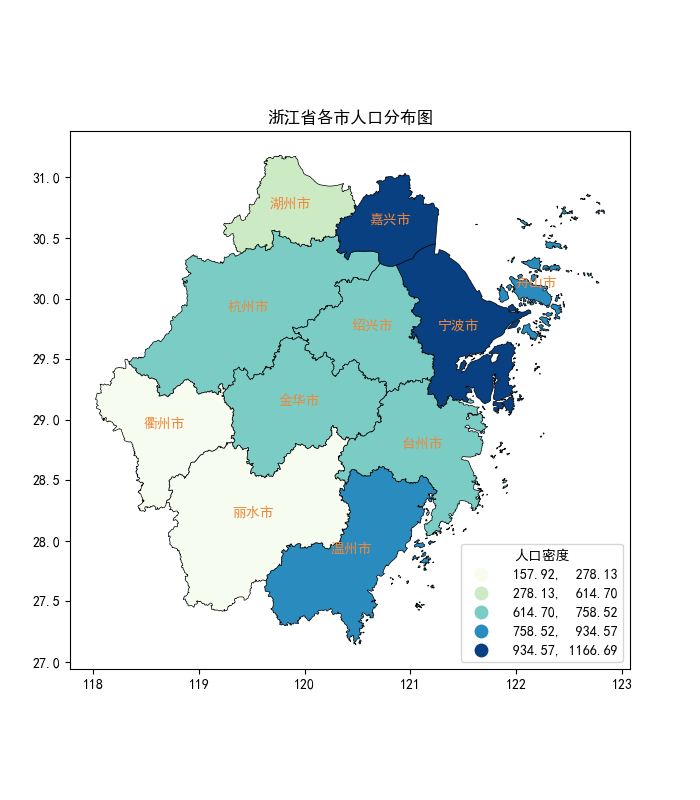

In [127]:
%matplotlib widget
plt.rcParams['font.family'] = 'SimHei'
fig = plt.figure(figsize=(7, 8))
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))
ax.set_title('浙江省各市人口分布图')
zhejiand_pop.plot(ax = ax, edgecolor = 'black',
                  linewidth = 0.5,
                  column = '人口密度',
                  legend = True,
                  legend_kwds = {
                      'title': '人口密度',
                      'loc': 'lower right',
                      'ncol': 1,
                  },
                  cmap = 'GnBu',
                  scheme = 'NaturalBreaks',
                  k = 5,
                 )
zhejiand_pop.apply(lambda x: ax.annotate(text=x['市'],
                                          xy=x.geometry.centroid.coords[0], 
                                          ha='center',
                                          color = '#ef883b'
                                        ), axis=1)